<a href="https://colab.research.google.com/github/artientin/DeepLearning_Model3/blob/main/Training%20Model%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DEEP LEARNING MODEL 3**

Data Wrangling

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datrain = "/content/drive/MyDrive/train"
datest = "/content/drive/MyDrive/test"

In [ ]:
import os
import cv2
import random
import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split
import shutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from collections import Counter
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [ ]:
categories_train = [folder for folder in os.listdir(datrain) if os.path.join(datrain, folder)]
print (f"Eye Dataset Train: {categories_train}")

Eye Dataset Train: ['center', 'left', 'right']


In [ ]:
categories_test = [folder for folder in os.listdir(datest) if os.path.join(datest, folder)]
print (f"Eye Dataset Test: {categories_test}")

Eye Dataset Test: ['left', 'center', 'right']


In [ ]:
total_dtrain = sum(len(os.listdir(os.path.join(datrain, category))) for category in categories_train)
total_dtest = sum(len(os.listdir(os.path.join(datest, category))) for category in categories_test)

print(f"Total Images in Train Dataset: {total_dtrain}")
print(f"Total Images in Test Dataset: {total_dtest}")

Total Images in Train Dataset: 3622
Total Images in Test Dataset: 831


In [ ]:
def count_file_types(directory):
    return Counter(os.path.splitext(file)[1].lower()
                   for category in os.listdir(directory)
                   if os.path.isdir(os.path.join(directory, category))
                   for file in os.listdir(os.path.join(directory, category)))

data = {"Train": datrain, "Test": datest}

for dataset_name, dataset in data.items():
    print(f"\nDistribusi Jenis File di {dataset_name} Dataset:")
    for ext, count in count_file_types(dataset).items():
        print(f"{ext}: {count} file")



Distribusi Jenis File di Train Dataset:
.jpg: 3622 file

Distribusi Jenis File di Test Dataset:
.jpg: 831 file


In [ ]:
dtrain_distribution = {category: len(os.listdir(os.path.join(datrain, category))) for category in categories_train}
dtest_distribution = {category: len(os.listdir(os.path.join(datest, category))) for category in categories_test}

print("Jumlah Gambar per Kategori di Train Dataset:")
for category, count in dtrain_distribution.items():
    print(f"{category}: {count} gambar")

print("\nJumlah Gambar per Kategori di Test Dataset:")
for category, count in dtest_distribution.items():
    print(f"{category}: {count} gambar")

Jumlah Gambar per Kategori di Train Dataset:
center: 1225 gambar
left: 1224 gambar
right: 1173 gambar

Jumlah Gambar per Kategori di Test Dataset:
left: 273 gambar
center: 243 gambar
right: 315 gambar


In [ ]:
unique_shapes = set()

for category in categories_train:
  cat_path = os.path.join(datrain, category)
  for file in os.listdir(cat_path):
    img = cv2.imread(os.path.join(cat_path, file))
    if img is not None:
      unique_shapes.add(img.shape[:2])

print(f"Unique image shapes in dataset: {unique_shapes}")

Unique image shapes in dataset: {(56, 64)}


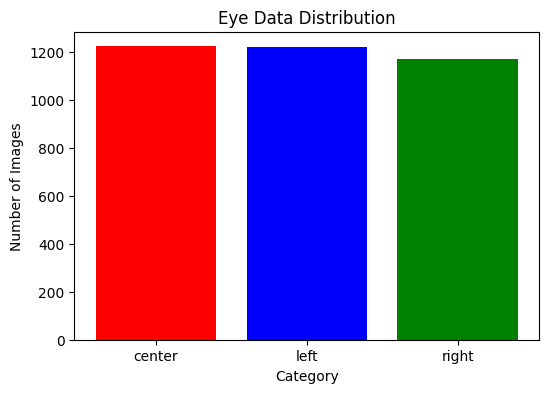

In [ ]:
data_distribution = {category: len(os.listdir(os.path.join(datrain, category))) for category in categories_train}

plt.figure(figsize=(6,4))
plt.bar(data_distribution.keys(), data_distribution.values(), color=["red", "blue", "green"])
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Eye Data Distribution")
plt.show()

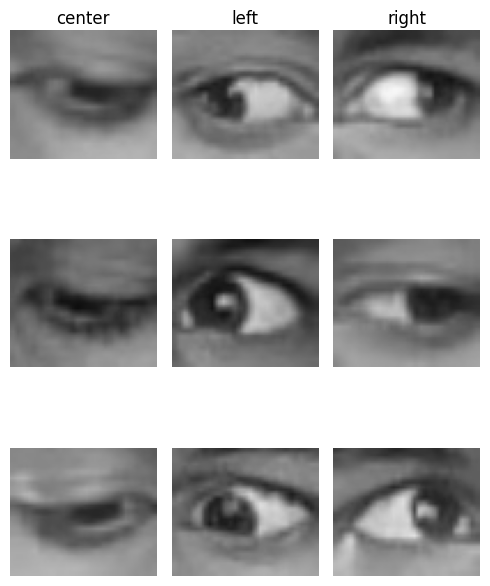

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(5, 7))

for i, category in enumerate(categories_train):
  image_files = random.sample(os.listdir(os.path.join(datrain, category)), 3)

  for j, img_file in enumerate(image_files):
    img = cv2.cvtColor(cv2.imread(os.path.join(datrain, category, img_file)), cv2.COLOR_BGR2RGB)

    ax = axes[j, i]
    ax.imshow(img)
    ax.axis("off")

    if j == 0:
      ax.set_title(category, fontsize=12, pad=5)

plt.tight_layout()
plt.show()

Preprocessing Data

In [ ]:
val = "/content/drive/MyDrive/valid"
os.makedirs(val, exist_ok=True)

for category in os.listdir(datrain):
  cat_path = os.path.join(datrain, category)
  images = os.listdir(cat_path)

  dtrain_files, dvalid_files = train_test_split(images, test_size=0.2, random_state=42)

  valid_cat_path = os.path.join(val, category)

  if not os.path.exists(valid_cat_path):
    os.makedirs(valid_cat_path)

  for img in dvalid_files:
    shutil.move(os.path.join(cat_path, img), os.path.join(valid_cat_path, img))

In [ ]:
davalid = "/content/drive/MyDrive/valid"

In [ ]:
categories_valid = [folder for folder in os.listdir(davalid) if os.path.join(davalid, folder)]
print (f"Eye Dataset Valid: {categories_valid}")

Eye Dataset Valid: ['center', 'left', 'right']


In [ ]:
dtrain_distribution = {category: len(os.listdir(os.path.join(datrain, category))) for category in categories_train}
dvalid_distribution = {category: len(os.listdir(os.path.join(davalid, category))) for category in categories_valid}

print("Jumlah Gambar per Kategori di Train Dataset:")
for category, count in dtrain_distribution.items():
    print(f"{category}: {count} gambar")

print("\nJumlah Gambar per Kategori di Valid Dataset:")
for category, count in dvalid_distribution.items():
    print(f"{category}: {count} gambar")

Jumlah Gambar per Kategori di Train Dataset:
center: 980 gambar
left: 979 gambar
right: 938 gambar

Jumlah Gambar per Kategori di Valid Dataset:
center: 245 gambar
left: 245 gambar
right: 235 gambar


In [ ]:
total_dtrain = sum(len(os.listdir(os.path.join(datrain, category))) for category in categories_train)
total_dvalid = sum(len(os.listdir(os.path.join(davalid, category))) for category in categories_valid)

print(f"Total Images in Train Dataset: {total_dtrain}")
print(f"Total Images in Valid Dataset: {total_dvalid}")

Total Images in Train Dataset: 2897
Total Images in Valid Dataset: 725


In [ ]:
img = imread("/content/drive/MyDrive/train/left/68.jpg")
img = np.expand_dims(img, axis=-1)
image_shape = img.shape
print(img.shape)

(56, 64, 1)


In [ ]:
datrain_gen=ImageDataGenerator(
                             rotation_range=10,
                             rescale=1/255.,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             fill_mode="nearest"
                              )

davalid_gen = ImageDataGenerator(
                              rescale=1./255)

datest_gen=ImageDataGenerator(
                              rescale=1./255)

In [ ]:
datrain_gen.flow_from_directory(datrain)
davalid_gen.flow_from_directory(davalid)
datest_gen.flow_from_directory(datest)

Found 2897 images belonging to 3 classes.
Found 725 images belonging to 3 classes.
Found 831 images belonging to 3 classes.


In [ ]:
batch_size = 32

In [ ]:
dtraining_set = datrain_gen.flow_from_directory(datrain,
                                                 target_size = image_shape[:2],
                                                 batch_size = batch_size,
                                                 color_mode = 'grayscale',
                                                 class_mode = 'categorical')

Found 2897 images belonging to 3 classes.


In [ ]:
dtesting_set = datrain_gen.flow_from_directory(datest,
                                                 target_size = image_shape[:2],
                                                 batch_size = batch_size,
                                                 color_mode = 'grayscale',
                                                 class_mode = 'categorical',
                                                 shuffle=False)

Found 831 images belonging to 3 classes.


In [ ]:
dvalidation_set = datrain_gen.flow_from_directory(davalid,
                                                 target_size = image_shape[:2],
                                                 batch_size = batch_size,
                                                 color_mode = 'grayscale',
                                                 class_mode = 'categorical',
                                                 shuffle=False)

Found 725 images belonging to 3 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding="same",input_shape=image_shape, activation="relu",))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding="same", activation="relu",))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding="same", activation="relu",))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(len(dtraining_set.class_indices),  activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 56, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 28, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7168)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,670,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,764,739 (14.36 MB)

 Trainable params: 3,764,739 (14.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
dtesting_set.class_indices

{'center': 0, 'left': 1, 'right': 2}

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    dtraining_set,
    epochs=15,
    validation_data=dvalidation_set,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 45s 472ms/step - accuracy: 0.6396 - loss: 0.7179 - val_accuracy: 0.9476 - val_loss: 0.1364
Epoch 2/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 79s 444ms/step - accuracy: 0.9619 - loss: 0.1046 - val_accuracy: 0.9931 - val_loss: 0.0392
Epoch 3/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 42s 463ms/step - accuracy: 0.9878 - loss: 0.0425 - val_accuracy: 0.9945 - val_loss: 0.0266
Epoch 4/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 42s 462ms/step - accuracy: 0.9937 - loss: 0.0214 - val_accuracy: 0.9959 - val_loss: 0.0141
Epoch 5/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 44s 486ms/step - accuracy: 0.9911 - loss: 0.0221 - val_accuracy: 0.9959 - val_loss: 0.0200
Epoch 6/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 42s 462ms/step - accuracy: 0.9961 - loss: 0.0145 - val_accuracy: 0.9903 - val_loss: 0.0306
Epoch 7/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 42s 463ms/step - accuracy: 0.9903 - loss: 0.0236 - val_accuracy: 0.9986 - val_loss: 0.0058
Epoch 8/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 46s 503ms/step - accuracy: 0.9920 - loss: 0.0158 - val_accu

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: title={'center': 'Training & Validation Loss'}>

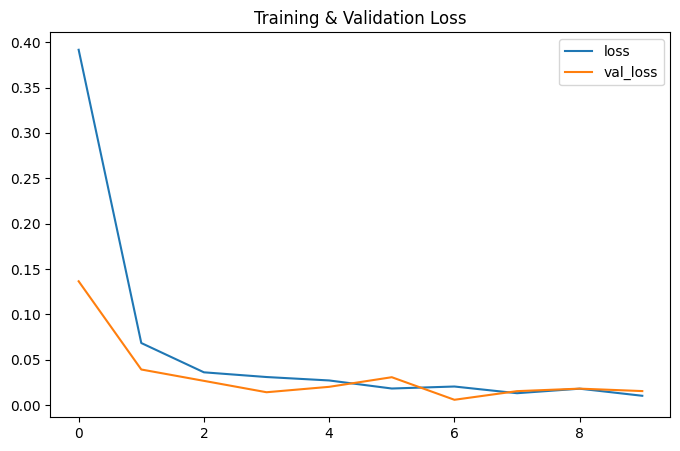

In [ ]:
losses[['loss', 'val_loss']].plot(title="Training & Validation Loss", figsize=(8, 5))

<Axes: title={'center': 'Training & Validation Accuracy'}>

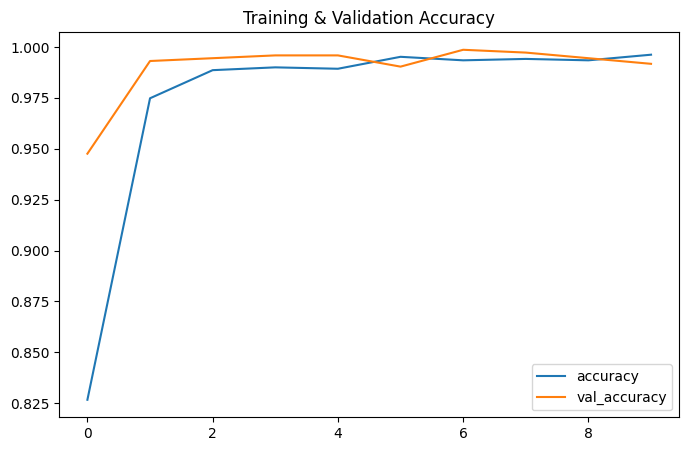

In [ ]:
losses[['accuracy', 'val_accuracy']].plot(title="Training & Validation Accuracy", figsize=(8, 5))

In [ ]:
X_test, y_test = next(dtesting_set)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 1.0000 - loss: 1.2954e-04
Test Accuracy: 1.0000
Test Loss: 0.0001


In [ ]:
y_true = dtesting_set.classes
y_pred_probs = model.predict(dtesting_set)
y_pred = np.argmax(y_pred_probs, axis=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 213s 8s/step


In [ ]:
class_names = list(dtesting_set.class_indices.keys())

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm = confusion_matrix(y_true, y_pred)

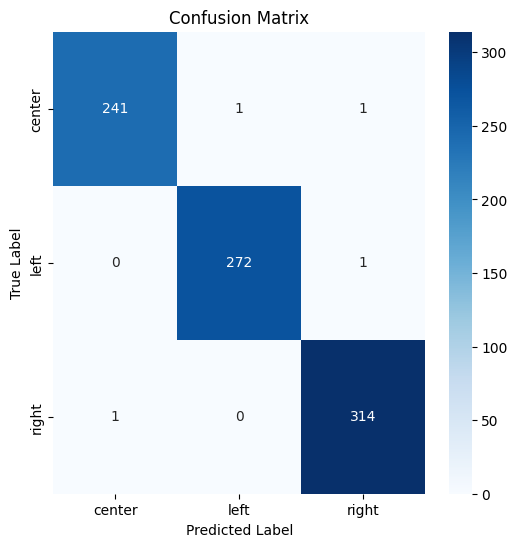

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

      center       1.00      0.99      0.99       243
        left       1.00      1.00      1.00       273
       right       0.99      1.00      1.00       315

    accuracy                           1.00       831
   macro avg       1.00      0.99      1.00       831
weighted avg       1.00      1.00      1.00       831



In [ ]:
# model.save("eye_model3_fix.h5")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/eye_model3_fix.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


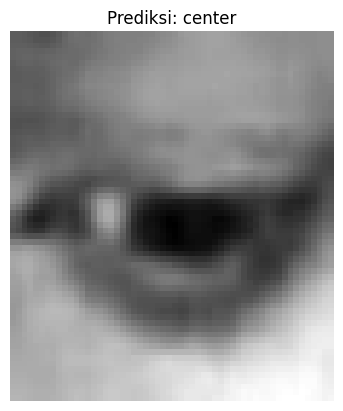

center: 0.8987
left: 0.0000
right: 0.1013


In [ ]:
from tensorflow.keras.preprocessing import image

test_image_path = "/content/drive/MyDrive/test/center/1033.jpg"

img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, image_shape[:2])

img_array = np.expand_dims(img, axis=-1)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalisasi

predictions = model.predict(img_array)

predicted_class = np.argmax(predictions)
predicted_label = list(dtraining_set.class_indices.keys())[predicted_class]

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(f"Prediksi: {predicted_label}", fontsize=12)
plt.show()

for category, prob in zip(dtraining_set.class_indices.keys(), predictions[0]):
    print(f"{category}: {prob:.4f}")
